In [186]:
import pandas as pd
import mlrose
import numpy as np
import time

np.random.seed(42)

In [187]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set_style('darkgrid')

In [189]:
raw_data = pd.read_csv('gamma.csv')
df = raw_data.copy()

map_values = {'g' : 1.0, 'h' : 0.0}
df['class'] = df['class'].map(map_values)

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fMLong,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1.0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1.0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1.0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1.0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1.0


In [190]:
from sklearn.model_selection import train_test_split

train_valid, test = train_test_split(df, test_size=0.2, random_state=42)
train, valid = train_test_split(train_valid, test_size=0.25, random_state=42)
X_train, y_train = np.asarray(train.iloc[:,:-1]), np.asarray(train.iloc[:,-1])
X_valid, y_valid = np.asarray(valid.iloc[:,:-1]), np.asarray(valid.iloc[:,-1])
X_test, y_test = np.asarray(test.iloc[:,:-1]), np.asarray(test.iloc[:,-1])

X_labels = list(df.columns)[:-1]

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [195]:
def fit_ro(algo, param):
    np.random.seed(42)
    if algo == 'genetic_alg':
        nn = mlrose.NeuralNetwork(hidden_nodes=[6,4,4,2], activation='relu', algorithm=algo, max_iters=param, bias=True, is_classifier=True, 
                                  learning_rate=0.0001, clip_max=5, pop_size=50)
    else:
        nn = mlrose.NeuralNetwork(hidden_nodes=[6,4,4,2], activation='relu', algorithm=algo, max_iters=param, bias=True, is_classifier=True, 
                                  learning_rate=0.0001, clip_max=5)
    nn.fit(X_valid, y_valid)
    return nn.loss

def get_results(algo, param):    
    start = time.time()
    loss = fit_ro(algo, param)
    end = time.time()
    runtime = end - start
    return loss, runtime

def loop_results(algo, rng):
    df_loss = pd.DataFrame()
    df_runtime = pd.DataFrame()
    loss = []
    runtime = []
    for i in rng:
        results = get_results(algo, i)
        loss.append(results[0])
        runtime.append(results[1])
    df_loss[algo + ' Loss'] = loss
    df_runtime[algo + ' Runtime'] = runtime
    return df_loss, df_runtime

In [196]:
algos = ['random_hill_climb', 'simulated_annealing', 'genetic_alg', 'gradient_descent']
loss_results = pd.DataFrame()
runtime_results = pd.DataFrame()
for algo in algos:
    print(algo)
    temp_loss, temp_runtime = loop_results(algo, range(100,1001, 100))
    loss_results = pd.concat([loss_results, temp_loss], join='outer', axis=1)
    runtime_results = pd.concat([runtime_results, temp_runtime], join='outer', axis=1)

random_hill_climb
simulated_annealing
genetic_alg
gradient_descent


In [197]:
loss_results['Iterations'] = range(100,1001,100)
loss_results

,random_hill_climb Loss,simulated_annealing Loss,genetic_alg Loss,gradient_descent Loss,Iterations
0,0.707884,0.707910,0.692744,0.691862,100
1,0.707856,0.707909,0.692744,0.669758,200
2,0.707830,0.707905,0.692744,0.519988,300
3,0.707809,0.707888,0.690002,0.470793,400
4,0.707786,0.707882,0.690002,0.458787,500
5,0.707758,0.707881,0.681303,0.452269,600
6,0.707732,0.707868,0.681303,0.448723,700
7,0.707706,0.707864,0.681303,0.446060,800
8,0.707685,0.707866,0.681303,0.444108,900
9,0.707659,0.707865,0.681303,0.442206,1000


In [198]:
loss_results_2 = pd.DataFrame()
runtime_results_2 = pd.DataFrame()
for algo in algos:
    print(algo)
    temp_loss, temp_runtime = loop_results(algo, range(1000,5001, 1000))
    loss_results_2 = pd.concat([loss_results_2, temp_loss], join='outer', axis=1)
    runtime_results_2 = pd.concat([runtime_results_2, temp_runtime], join='outer', axis=1)


random_hill_climb
simulated_annealing
gradient_descent


In [199]:
loss_results_2['Iterations'] = range(1000,5001,1000)
loss_results_2

,random_hill_climb Loss,simulated_annealing Loss,gradient_descent Loss,Iterations,genetic_alg Loss
0,0.707659,0.707865,0.442206,1000,0.681303
1,0.707454,0.707843,0.424053,2000,0.679456
2,0.707240,0.707883,0.417985,3000,0.679049
3,0.707065,0.707865,0.413723,4000,0.679049
4,0.706860,0.707972,0.411574,5000,0.665027


In [200]:
loss_results_master = pd.concat([loss_results,loss_results_2])
loss_results_master.drop(9,inplace=True)
loss_results_master.reset_index(inplace=True)
loss_results_master.drop('index', axis=1, inplace=True)
loss_results_master

,Iterations,genetic_alg Loss,gradient_descent Loss,random_hill_climb Loss,simulated_annealing Loss
0,100,0.692744,0.691862,0.707884,0.707910
1,200,0.692744,0.669758,0.707856,0.707909
2,300,0.692744,0.519988,0.707830,0.707905
3,400,0.690002,0.470793,0.707809,0.707888
4,500,0.690002,0.458787,0.707786,0.707882
5,600,0.681303,0.452269,0.707758,0.707881
6,700,0.681303,0.448723,0.707732,0.707868
7,800,0.681303,0.446060,0.707706,0.707864
8,900,0.681303,0.444108,0.707685,0.707866
9,1000,0.681303,0.442206,0.707659,0.707865


In [201]:
runtime_results

,random_hill_climb Runtime,simulated_annealing Runtime,genetic_alg Runtime,gradient_descent Runtime
0,0.275264,0.390953,9.135553,0.447802
1,0.501656,0.706112,18.092584,0.892612
2,0.776921,1.059165,27.046624,1.263618
3,1.011293,1.399256,36.298867,1.694466
4,1.263619,1.693468,45.493260,2.119328
5,1.572792,2.034556,54.163061,2.523248
6,1.817138,2.399579,63.355462,2.948110
7,2.058491,2.736677,71.978389,3.336072
8,2.338741,3.089732,81.034154,3.779885
9,2.615002,3.439795,89.806681,4.201757


In [204]:
runtime_results_2

,random_hill_climb Runtime,simulated_annealing Runtime,gradient_descent Runtime,genetic_alg Runtime
0,2.573112,3.471709,4.310465,124.238871
1,5.187120,6.873607,8.859293,232.578010
2,7.907838,10.338334,12.676078,369.092567
3,10.351301,13.798077,16.853900,481.914181
4,12.988244,17.157088,21.052663,612.323599


In [209]:
runtime_results_master = pd.concat([runtime_results,runtime_results_2])
runtime_results_master.drop(9,inplace=True)
runtime_results_master.reset_index(inplace=True)
runtime_results_master.drop('index', axis=1, inplace=True)
runtime_results_master['Iterations'] = loss_results_master['Iterations']
runtime_results_master

,genetic_alg Runtime,gradient_descent Runtime,random_hill_climb Runtime,simulated_annealing Runtime,Iterations
0,9.135553,0.447802,0.275264,0.390953,100
1,18.092584,0.892612,0.501656,0.706112,200
2,27.046624,1.263618,0.776921,1.059165,300
3,36.298867,1.694466,1.011293,1.399256,400
4,45.493260,2.119328,1.263619,1.693468,500
5,54.163061,2.523248,1.572792,2.034556,600
6,63.355462,2.948110,1.817138,2.399579,700
7,71.978389,3.336072,2.058491,2.736677,800
8,81.034154,3.779885,2.338741,3.089732,900
9,124.238871,4.310465,2.573112,3.471709,1000


In [211]:
loss_results_3 = pd.DataFrame()
runtime_results_3 = pd.DataFrame()
for algo in algos:
    print(algo)
    temp_loss, temp_runtime = loop_results(algo, range(10000,50001, 10000))
    loss_results_3 = pd.concat([loss_results_3, temp_loss], join='outer', axis=1)
    runtime_results_3 = pd.concat([runtime_results_3, temp_runtime], join='outer', axis=1)
loss_results_3['Iterations'] = range(10000,50001,10000)
loss_results_3

random_hill_climb
simulated_annealing
gradient_descent


,random_hill_climb Loss,simulated_annealing Loss,gradient_descent Loss,Iterations
0,0.705827,0.708076,0.404057,10000
1,0.703868,0.708099,0.399555,20000
2,0.701998,0.708171,0.397700,30000
3,0.700367,0.708156,0.396914,40000
4,0.698838,0.708133,0.396868,50000


In [151]:
loss_results_master_temp = pd.concat([loss_results,loss_results_2])
loss_results_master = pd.concat([loss_results_master_temp,loss_results_3])
loss_results_master.reset_index(inplace=True)
loss_results_master.drop('index', axis=1, inplace=True)
loss_results_master

,random_hill_climb Loss,simulated_annealing Loss,genetic_alg Loss,gradient_descent Loss,Iterations
0,0.705569,0.705621,0.692744,0.432450,100
1,0.705501,0.705617,0.692744,0.402755,200
2,0.705442,0.705617,0.692744,0.383137,300
3,0.705385,0.705611,0.690002,0.372588,400
4,0.705309,0.705619,0.690002,0.367288,500
5,0.705249,0.705634,0.681303,0.362947,600
6,0.705183,0.705617,0.681303,0.358982,700
7,0.705109,0.705629,0.681303,0.355069,800
8,0.705063,0.705674,0.681303,0.350745,900
9,0.704973,0.705738,0.681303,0.346034,1000


In [154]:
#loss_results_master.drop(10, inplace=True)
loss_results_master.reset_index(inplace=True)
loss_results_master.drop('index', inplace=True, axis=1)
loss_results_master

,random_hill_climb Loss,simulated_annealing Loss,genetic_alg Loss,gradient_descent Loss,Iterations
0,0.705569,0.705621,0.692744,0.432450,100
1,0.705501,0.705617,0.692744,0.402755,200
2,0.705442,0.705617,0.692744,0.383137,300
3,0.705385,0.705611,0.690002,0.372588,400
4,0.705309,0.705619,0.690002,0.367288,500
5,0.705249,0.705634,0.681303,0.362947,600
6,0.705183,0.705617,0.681303,0.358982,700
7,0.705109,0.705629,0.681303,0.355069,800
8,0.705063,0.705674,0.681303,0.350745,900
9,0.704973,0.705738,0.681303,0.346034,1000


In [178]:
lrm = loss_results_master.copy()

In [181]:
lrm.index = lrm['Iterations']
lrm.drop('Iterations', axis=1, inplace=True)
lrm.columns = ['Random Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm', 'Gradient Descent']
lrm

,Random Hill Climbing,Simulated Annealing,Genetic Algorithm,Gradient Descent
Iterations,,,,
100,0.705569,0.705621,0.692744,0.432450
200,0.705501,0.705617,0.692744,0.402755
300,0.705442,0.705617,0.692744,0.383137
400,0.705385,0.705611,0.690002,0.372588
500,0.705309,0.705619,0.690002,0.367288
600,0.705249,0.705634,0.681303,0.362947
700,0.705183,0.705617,0.681303,0.358982
800,0.705109,0.705629,0.681303,0.355069
900,0.705063,0.705674,0.681303,0.350745


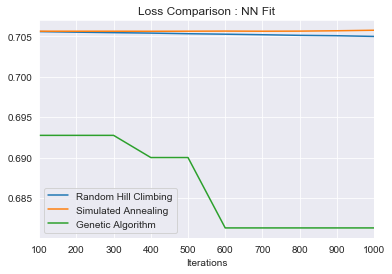

In [185]:
lrm.drop('Gradient Descent', axis=1)[:10].plot(title='Loss Comparison : NN Fit')

In [157]:
runtime_results['Iterations'] = range(100,1001,100)
runtime_results_2['Iterations'] = range(1000,5001,1000)
runtime_results_3['Iterations'] = range(10000,50001,10000)

In [161]:
runtime_results_master_temp = pd.concat([runtime_results,runtime_results_2])
runtime_results_master = pd.concat([runtime_results_master_temp,runtime_results_3])
runtime_results_master.reset_index(inplace=True)
runtime_results_master.drop('index', axis=1, inplace=True)
runtime_results_master

,random_hill_climb Runtime,simulated_annealing Runtime,genetic_alg Runtime,gradient_descent Runtime,Iterations
0,0.340089,0.380981,11.442412,0.467749,100
1,0.555514,0.731045,23.534060,1.018277,200
2,0.860699,1.080111,34.530650,1.431172,300
3,1.126985,1.650586,47.574764,1.937817,400
4,1.384298,1.857034,61.023796,2.563145,500
5,1.743353,2.198121,71.020076,2.784553,600
6,2.600045,2.550180,81.536978,3.260281,700
7,2.519262,2.905230,91.915684,3.918521,800
8,3.022916,3.306158,121.369431,4.150899,900
9,3.094723,3.644254,124.238871,4.892914,1000


In [162]:
runtime_results_master.drop(10, inplace=True)
runtime_results_master.reset_index(inplace=True)
runtime_results_master.drop('index', axis=1, inplace=True)
runtime_results_master

,random_hill_climb Runtime,simulated_annealing Runtime,genetic_alg Runtime,gradient_descent Runtime,Iterations
0,0.340089,0.380981,11.442412,0.467749,100
1,0.555514,0.731045,23.534060,1.018277,200
2,0.860699,1.080111,34.530650,1.431172,300
3,1.126985,1.650586,47.574764,1.937817,400
4,1.384298,1.857034,61.023796,2.563145,500
5,1.743353,2.198121,71.020076,2.784553,600
6,2.600045,2.550180,81.536978,3.260281,700
7,2.519262,2.905230,91.915684,3.918521,800
8,3.022916,3.306158,121.369431,4.150899,900
9,3.094723,3.644254,124.238871,4.892914,1000


In [167]:
rrm = runtime_results_master.copy()

In [172]:
rrm.index = rrm['Iterations']
rrm.columns = ['Random Hill Climbing', 'Simulated Annealing', 'Genetic Algorithm', 'Gradient Descent', 'Iterations']
rrm.drop('Iterations', axis=1, inplace=True)

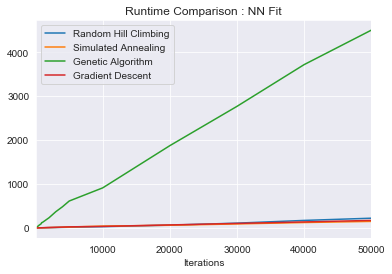

In [176]:
rrm.plot(title='Runtime Comparison : NN Fit')

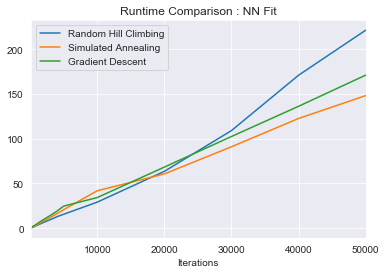

In [177]:
rrm.drop('Genetic Algorithm', axis=1).plot(title='Runtime Comparison : NN Fit')

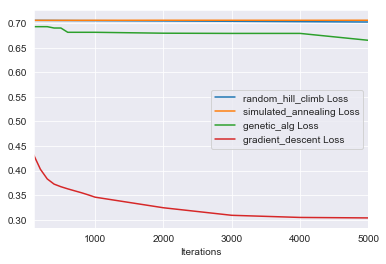

In [147]:
loss_results_master.plot(x='Iterations')